**STATISTICAL LEARNING AND NEURAL NETWORKS, A.A. 2022/2023**

**COMPUTER LAB 2** - Model fitting and classification

**Duration: 6 hours**

**Exercise 1 – Model fitting for continuous distributions: Multivariate Gaussian**

In this exercise, you will employ a dataset based on the classic dataset *Iris Plants Database* https://archive.ics.uci.edu/ml/datasets/iris. You will be provided a subset of this dataset comprising only two classes (*Iris Setosa* and *Iris Versicolour*), and only two features per class (*petal length* in cm and *petal width* in cm). The objective is to the determine the kind of iris based on the content of the features.

**Task:** you have to fit class-conditional Gaussian multivariate distributions to the data, and visualize the probability density functions. In particular, you should perform the following:


*   Divide the dataset in two parts (*Iris Setosa* which corresponds to class zero and *Iris Versicolour* which correspond to class 1). Then work only on one class at a time.
*   Plot the data of each class (use the *plt.scatter( )* function)
*   Visualize the histogram of petal length and petal width (use e.g. the *plt.hist( )* function)
*   Calculate the maximum likelihood estimate of the mean and covariance matrix under a multivariate Gaussian model, independently for each class (these are the parameters of the class-conditional distributions). Note: is the Gaussian model good for these data?
*    Visualize the 2-D joint pdf of petal length and width for the two classes.

In [102]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import h5py

Dataset1 = h5py.File("Lab2_Ex_1_Iris.hdf5")
Data = np.array(Dataset1.get('Dataset'))

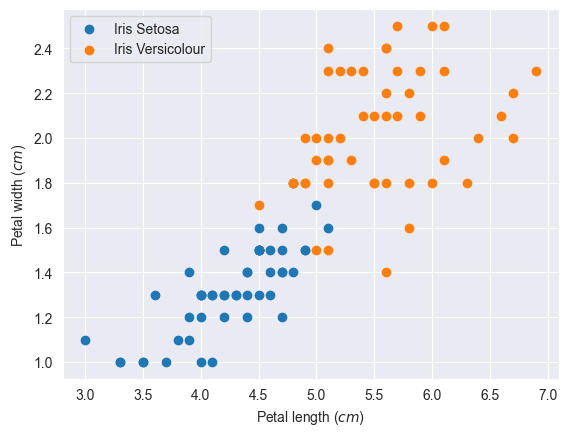

In [103]:
#Separate the dataset in the two classes, you can use the numpy function argsort and unique to do this.
dataset_c0 = Data[Data[:, -1] == 0, :]
dataset_c1 = Data[Data[:, -1] == 1, :]
#Draw the scatter plot of the two classes on the same image
plt.figure()
plt.scatter(x=dataset_c0[:, 0], y=dataset_c0[:, 1])  #Iris Setosa
plt.scatter(x=dataset_c1[:, 0], y=dataset_c1[:, 1])  #Iris Versicolour
plt.xlabel('Petal length ($cm$)')
plt.ylabel('Petal width ($cm$)')
labels = ['Iris Setosa', 'Iris Versicolour']
plt.legend(labels)
plt.show()

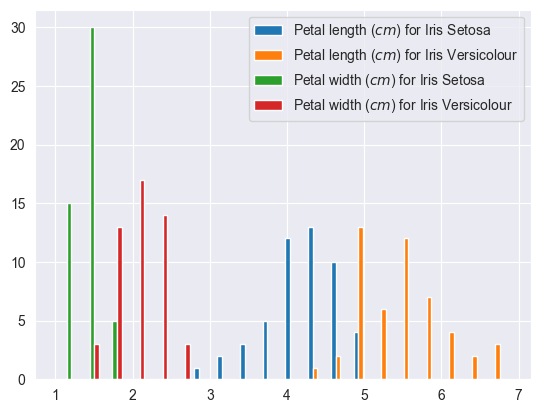

In [104]:
#Visualize the histogram of petal length and petal width (use e.g. the plt.hist() function)
plt.figure()
plt.hist([dataset_c0[:, 0], dataset_c1[:, 0], dataset_c0[:, 1], dataset_c1[:, 1]], histtype='bar', bins=20)
features = ['Petal length ($cm$) for Iris Setosa', 'Petal length ($cm$) for Iris Versicolour',
            'Petal width ($cm$) for Iris Setosa', 'Petal width ($cm$) for Iris Versicolour']
# plt.hist([Data[:, 0], Data[:, 1]], histtype='bar', bins=20)
# features = ['Petal length ($cm$)', 'Petal width ($cm$)']
plt.legend(features)
plt.show()

In [105]:
def cov_matrix(x, mean=None):
    """
    :param x: matrix representing a (column) RANDOM VECTOR, with random variables on its rows
    :return: the covariance matrix of x
    """
    D = x.shape[0]
    if mean is None:
        mean = np.mean(x, axis=1)
    x_bar = (x.T - mean).T
    cov = np.empty(shape=(D, D))
    for i in range(D):
        for j in range(D):
            cov[i, j] = np.mean(np.multiply(x_bar[i], x_bar[j]))
    return cov

In [100]:
#Calculate mean and covariance matrix under a multivariate Gaussian model. Scalar products can be computed with the function np.matmul()

#The transpose can be obtained with the function np.transpose 

#To make a scalar product between arrays in the form [Mx1]x[1xM] starting from 1D array A it may be necessary to add a new axis using 
#the function A[:,np.newaxis]
v = np.array([dataset_c0[:, :2], dataset_c1[:, :2]])
N_c = [v[i].shape[1] for i in range(2)]
mean = np.array([np.mean(v[i], axis=0) for i in range(2)])
# cov = np.array([np.cov(v[i].T) for i in range(2)])
cov = np.array([cov_matrix(v[i].T) for i in range(2)])

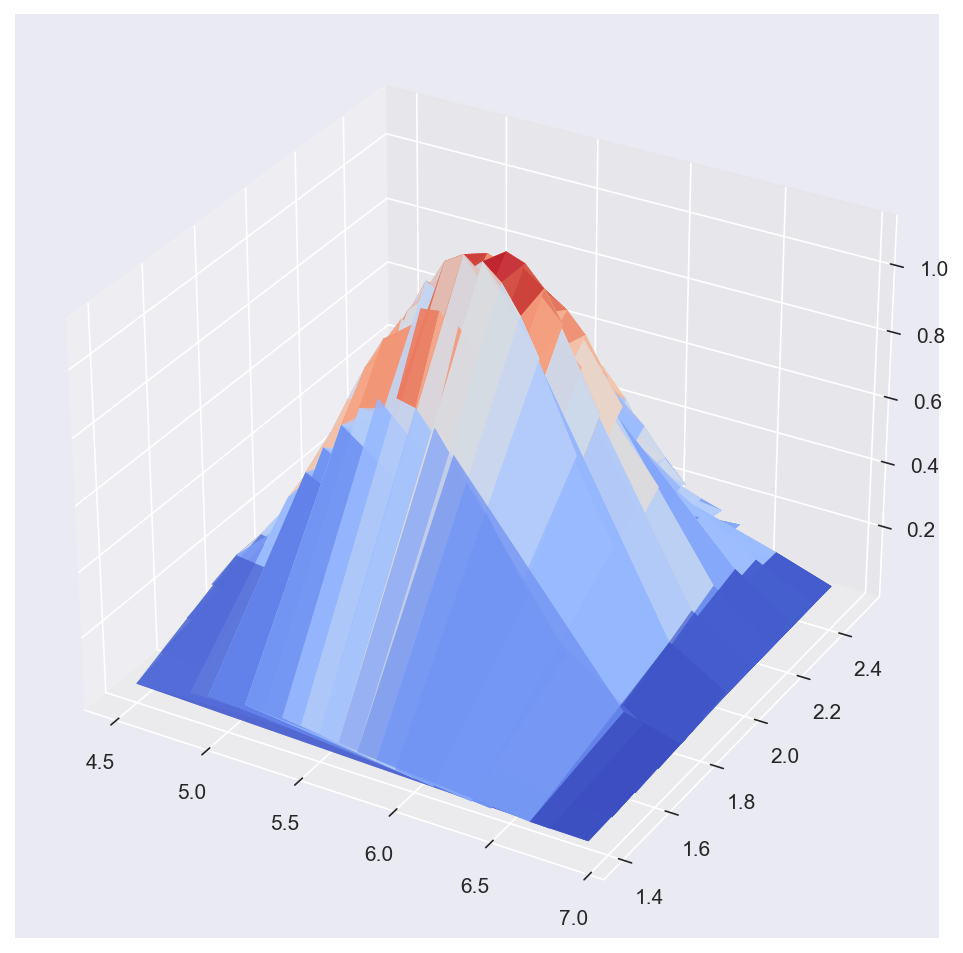

In [101]:
from scipy.stats import multivariate_normal
from matplotlib import cm
from matplotlib.ticker import LinearLocator

pdf = [multivariate_normal(mean=mean[i], cov=cov[i]) for i in range(2)]

#Create a grid of x and y values on which to sample the pdf, this is done by providing a list of x-y of coordinates to the function pdf_class0.pdf(...)
#A 3D view of the pdf can be obtained using the function ax.plot_surface

c = 1

X = v[c][:, 0]
Y = v[c][:, 1]

X, Y = np.meshgrid(X, Y)
X_flat = X.flatten()
Y_flat = Y.flatten()
XY_list = np.concatenate((X_flat[:, np.newaxis], Y_flat[:, np.newaxis]), axis=1)
PDF_values = np.reshape(pdf[c].pdf(XY_list), np.shape(X))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 8), dpi=150)
ax.plot_surface(X, Y, PDF_values, cmap=cm.coolwarm, alpha=0.7, linewidth=0)

#To change the orientation of the 3D plot the function ax.view_init(), for a view from above select ax.view_init( 90, 0)

In [103]:
#After visualizing the pdf you can plot the points of the dataset on the estimated pdf using ax.scatter3D()
#For a better visualization of the points we suggest to make the pdf plot semi-transparent using the alpha parameter

#Code Example: 
PDF_points = pdf[c].pdf(v[c])
Points_Feature0 = v[c].T[0, :]
Points_Feature1 = v[c].T[1, :]
ax.scatter3D(Points_Feature0, Points_Feature1, PDF_points, s=10)

#Note: the sample code was written only for class 0 but two plots have to be done, one for class 0 and one for class 1
#Note 2: the content of variables like Features_class0, Points_Class0_Feature0, Points_Class0_Feature1 should be substituted with variables created by the student

**Student's comments to Exercise 1**

*Add comments to the results of Exercise 1 here (may use LateX for formulas if needed).*

**Exercise 2 - Model fitting for discrete distributions: Bag of Words**


In this exercise, you will employ a real dataset (file *SMSSpamCollection*). The SMS Spam Collection v.1 (https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset) is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.
Task: you have to fit the parameters employed by a Naïve Bayes Classifier, using a Bernoulli model. Under this model, the parameters are:

*   $\pi_{c}$, the prior probabilities of each class.
*   $\theta_{jc}$, the probability that feature j is equal to 1 in class c.

Model fitting can be done using the pseudocode at the end of the Lecture 3 slides.

Display the class-conditional densities $\theta_{jc1}$ and $\theta_{jc2}$. Try to identify “uninformative” features (i.e., features j such that $\theta_{jc1}$ ≃ $\theta_{jc2}$).

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# reading the data
data = pd.read_csv("SMSSpamCollection", encoding="ISO-8859-1", sep="\t", header=None)
data.rename(columns={0: "labels", 1: "text"}, inplace=True)
# display(data)

# Transform data to bag of word representation
bagger = CountVectorizer(
    max_features=2500,
    binary=True,  # Bernoulli Model
    token_pattern=r"(?u)\b[a-zA-Z][a-zA-Z]+\b",
)
# bag will contain a matrix, which each element is the number of occurrences for each word
bag = bagger.fit_transform(data["text"]).toarray()
# feature names will contain each existing word in the data
feature_names = bagger.get_feature_names_out()

data = pd.concat([data, pd.DataFrame(bag, columns=feature_names)], axis=1)
# display(data)

X_train = data.iloc[:2000, 2:].to_numpy()
X_test = data.iloc[2000:3000, 2:].to_numpy()
y_train = data.iloc[:2000, 0].to_numpy() == 'ham'
y_test = data.iloc[2000:3000, 0].to_numpy() == 'ham'

In [9]:
#Evaluate the probabilities of the two classes, and the class conditional densities.
N = len(X_train)
N_features = len(feature_names)
N_c = np.zeros(2)
N_jc = np.zeros(shape=(N_features, 2))
for i in range(N):
    c = 0 if y_train[i] else 1
    N_c[c] += 1
    for j in range(N_features):
        N_jc[j, c] += X_train[i, j]
pi_c = N_c / N
# display(pijc)

In [10]:
#Display the class-conditional densities θjc1 and θjc2.
theta_jc = np.array([N_jc[:, i] / N_c[i] for i in range(2)]).T
# display(theta_jc)

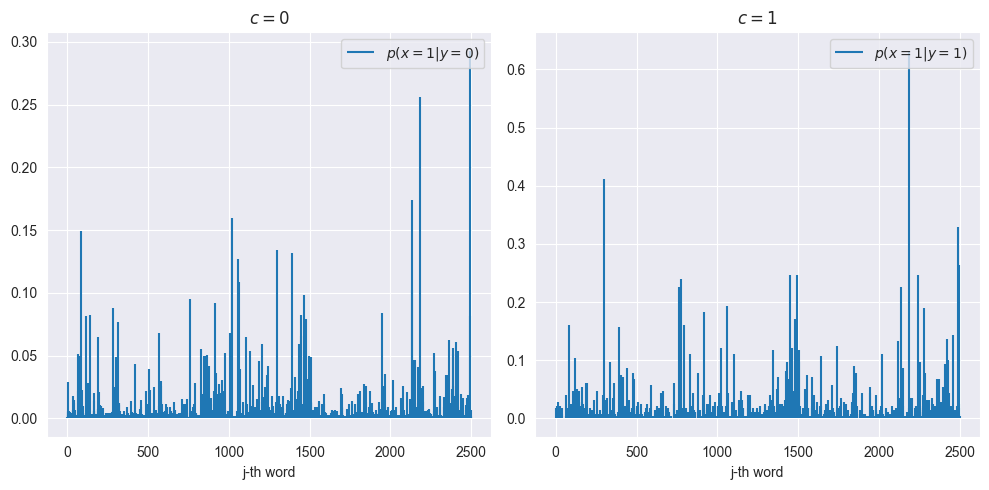

In [11]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.set_title('$c = 0$')
ax1.vlines(x=np.arange(len(theta_jc[:, 0])), ymin=0, ymax=theta_jc[:, 0], label='$p(x=1|y=0)$')
ax1.set_xlabel('j-th word')
ax1.legend()

ax2.set_title('$c = 1$')
ax2.vlines(x=np.arange(len(theta_jc[:, 1])), ymin=0, ymax=theta_jc[:, 1], label='$p(x=1|y=1)$')
ax2.set_xlabel('j-th word')
ax2.legend()

plt.tight_layout()
plt.show()

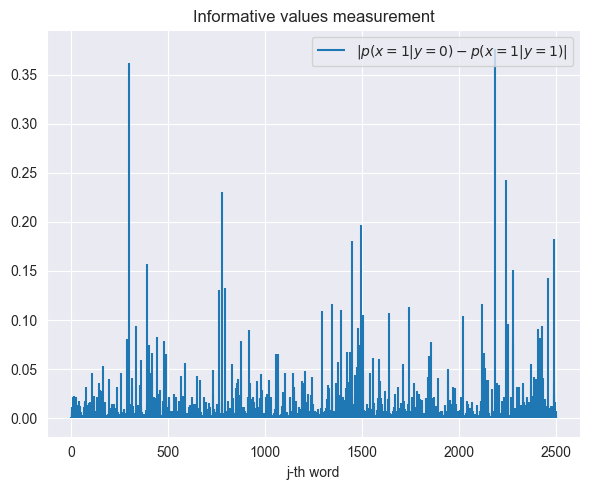

In [12]:
plt.figure(figsize=(6, 5))

plt.title('Informative values measurement')
plt.vlines(x=np.arange(len(theta_jc[:, 0])),
           ymin=0,
           ymax=np.abs(theta_jc[:, 0] - theta_jc[:, 1]),
           label='$|p(x=1|y=0) - p(x=1|y=1)|$')
plt.xlabel('j-th word')
plt.legend()
plt.tight_layout()
plt.show()

**Student's comments to Exercise 2**

*Add comments to the results of Exercise 2 here (may use LateX for formulas if needed).*

**Exercise 3 - Classification – discrete data**

In this exercise, you will design a Naïve Bayes Classifier (NBC) for the Bag of Words (BoW) features for document classification that have been prepared in *Exercise 2*. In particular, in *exercise 2*, you have already estimated the following parameters:


*   The prior probabilities of each class, $\pi_{c} = p(y=c)$.
*   The class-conditional probabilities of each feature, $\theta_{jc} = p(x_{j}=1 | y=c)$.

These parameters have been estimated from the training data. In this exercise, you will use the test data, and classify each test vector using an NBC whose model has been fitted in *Exercise 2*. In particular, you will do the following:



*   For each test vector, calculate the MAP estimate of the class the test vector belongs to. Remember: the MAP classifier chooses the class that maximizes $\mathop{\max\limits_c{\log p(y=c|x)} \propto \log p(x|y=c)} + \log p(c)$. In the NBC, the features (i.e. each entry of $x$) are assumed to be statistically independent, so $p(x|y=c) = \prod_{j=1}^{D}p(x_{j}|y=c)$. This formula allows you to calculate $p(x|y=c)$ for a given test vector $x$ using the parameters $\theta_{jc}$ already calculated in *Exercise 2*. Note that, after the logarithm, the product 
becomes a summation. It is much better to use the logarithm in order to avoid underflow.
*   See how the accuracy changes when the prior is not taken into account (e.g. by comparing the MLE and MAP estimate).
*   After classifying a test vector using the NBC, the obtained class can be compared with the truth (vector *ytest*).
*   The accuracy of the classifier can be computed as the percentage of times that the NBC provides the correct class for a test vector.
*   Repeat the same operations using the training data as test data, and compare the accuracy of the classifier on the training and test data.
*   Note: It is expected that students implement the Naive Bayes classifier from scratch without using pre-made functions such as sklearn.naive_bayes

**Optional:**

If you plot the class-conditional densities as done at the end of Exercise 2, you will see that many features are uninformative; e.g., words that appear very often (or very rarely) in documents belonging to either class are not very helpful to classify a document. The NBC can perform a lot better if these uninformative features are disregarded during the classification, i.e. only a subset of the features, chosen among the most informative ones, are retained. To rank the features by “significance”, one can employ the mutual information between feature $x_{j}$ and class $y$ (see Sec. 3.5.4 of the textbook):

\begin{align*}
I(X,Y) = \sum_{xj} \sum_{y}p(x_{j},y) \log \frac{p(x_{j},y)}{p(x_{j})p(y)}
\end{align*}

For binary features, the mutual information of feature j can be written as:

\begin{align*}
I_{j} = \sum_{c} \left[\theta_{jc}\pi_{c}\log \frac{\theta_{jc}}{\theta_{j}}+ (1 - \theta_{jc})\pi_{c} \log \frac{1 - \theta_{jc}}{1 - \theta_{j}}\right]
\end{align*}

with $\theta_{j}=p(x_{j}=1)=\sum_{c}\pi_{c}\theta_{jc}$. For this part, you should:


*   Calculate $I_{j}$ for all features. Note: try to avoid divisions by zero adding the machine precision constant *eps* to the denominators.
*   Rank the features by decreasing values of $I_{j}$, and keep only the $K$ most important ones.

*    Run the classifier employing only the $K$ most important features, and calculate the accuracy.

*    Plot the accuracy as a function of $K$.

In [13]:
# Naive Bayes Classifier with parameters
def NBC(X, theta_jc, pi_c, features_indices=None, MAP_estimation=True):
    N = X.shape[0]
    N_c = len(pi_c)
    if features_indices is None:
        features_indices = np.arange(X.shape[1])
    matches = [np.intersect1d(np.argwhere(X[i, :] == 1), features_indices) for i in range(N)]
    LH = np.zeros(shape=(N, N_c))
    eps = 1e-10
    for c in range(N_c):
        for i in range(N):
            LH[i, c] = sum(np.log(theta_jc[j, c] + eps) for j in matches[i])
    if MAP_estimation:
        return np.array([np.argmax([LH[i, c] + pi_c[c] for c in range(N_c)]) for i in
                         range(N)])  # returning result of MAP estimation
    return np.array([np.argmax([LH[i, c] for c in range(N_c)]) for i in range(N)])  # returning result of MLE estimation

In [14]:
#Evaluate the MAP on the test set
N_test = len(X_test)

y_test_MAP = NBC(X_test, theta_jc, pi_c, MAP_estimation=True)
y_test_MAP_bool = [not bool(y_test_MAP[i]) for i in range(N_test)]

accuracy_MAP_test = sum(y_test_MAP_bool[i] == y_test[i] for i in range(N_test)) / N_test
print(f'Accuracy of MAP: {accuracy_MAP_test * 100}%')

Accuracy of MAP: 94.89999999999999%


In [15]:
#Evaluate the MLE on the test set
y_test_MLE = NBC(X_test, theta_jc, pi_c, MAP_estimation=False)
y_test_MLE_bool = [not bool(y_test_MLE[i]) for i in range(N_test)]

accuracy_MLE_test = sum(y_test_MLE_bool[i] == y_test[i] for i in range(N_test)) / N_test
print(f'Accuracy of MLE on test dataset: {accuracy_MLE_test * 100}%')

Accuracy of MLE on test dataset: 94.19999999999999%


In [16]:
#Evaluate the MAP on the training set
N_train = len(X_train)
y_train_MAP = NBC(X_train, theta_jc, pi_c, MAP_estimation=True)
y_train_MAP_bool = [not bool(y_train_MAP[i]) for i in range(N_train)]

accuracy_MAP_train = sum(y_train_MAP_bool[i] == y_train[i] for i in range(N_train)) / N_train
print(f'Accuracy of MAP: {accuracy_MAP_train * 100}%')

Accuracy of MAP: 98.4%


In [17]:
#Evaluate the MLE on the training set
y_train_MLE = NBC(X_train, theta_jc, pi_c, MAP_estimation=False)
y_train_MLE_bool = [not bool(y_train_MLE[i]) for i in range(N_train)]

accuracy_MLE_train = sum(y_train_MLE_bool[i] == y_train[i] for i in range(N_train)) / N_train
print(f'Accuracy of MLE on train dataset: {accuracy_MLE_train * 100}%')

Accuracy of MLE on train dataset: 97.95%


In [18]:
#Optional section
eps = 1e-10
theta_j = np.array([sum(pi_c[c] * theta_jc[j, c] for c in range(2)) for j in range(len(feature_names))])
Ij = np.zeros(len(feature_names))
for j in range(len(feature_names)):
    for c in range(2):
        Tpos = theta_jc[j, c] * np.log((eps + theta_jc[j, c]) / (eps + theta_j[j]))
        Tneg = (1 - theta_jc[j, c]) * np.log((eps + 1 - theta_jc[j, c]) / (eps + 1 - theta_j[j]))
        Ij[j] += pi_c[c] * (Tpos + Tneg)

In [19]:
K = 2000
Ij_sorted_rev = np.argsort(Ij)[::-1]

y_test_MAP_K = NBC(X_test, theta_jc, pi_c, features_indices=Ij_sorted_rev[:K], MAP_estimation=True)
y_test_MAP_K_bool = [not bool(y_test_MAP_K[i]) for i in range(N_test)]

accuracy_MAP_K_test = sum(y_test_MAP_K_bool[i] == y_test[i] for i in range(N_test)) / N_test
print(f'Accuracy of MAP (using all features): {accuracy_MAP_test * 100}%')
print(f'Accuracy of MAP (using {K} more informative features): {accuracy_MAP_K_test * 100}%')

Accuracy of MAP (using all features): 94.89999999999999%
Accuracy of MAP (using 2000 more informative features): 95.1%


In [20]:
# Evaluation of NBC as a function of K
step = 50
accuracies = np.empty(int(len(feature_names) / step))
for k in range(len(accuracies)):
    y_hat = NBC(X_test, theta_jc, pi_c, features_indices=Ij_sorted_rev[:(k + 1) * step])
    y_hat_bool = [not bool(y_hat[i]) for i in range(N_test)]

    accuracies[k] = sum(y_hat_bool[i] == y_test[i] for i in range(N_test)) / N_test
max_accuracy_index = np.argmax(accuracies)
max_accuracy_K = max_accuracy_index * step
print(f'Max accuracy found: {accuracies[max_accuracy_index] * 100}% for K = {max_accuracy_index * step}')

Max accuracy found: 95.1% for K = 1950


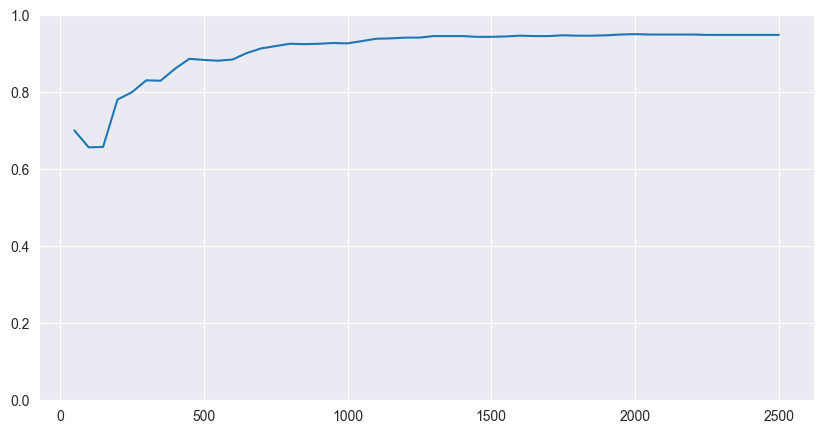

In [21]:
plt.figure(figsize=(10, 5))
plt.plot((np.arange(len(accuracies)) + 1) * step, accuracies)
plt.ylim([0, 1])
plt.show()

**Student's comments to Exercise 3**

*Add comments to the results of Exercise 3 here (may use LateX for formulas if needed).*

**Exercise 4 – Plotting the ROC curve**

For the discrete data classification problem of Exercise 3, analyse the performance of the classifier plotting the complete ROC curve, instead of simply measuring the accuracy. This requires to do the following.

*   Instead of classifying the documents choosing class 1 if $p(y=1|x)>p(y=2|x)$, now you can generalize this to choosing class 1 if $\frac{p(y=1|x)}{p(y=2|x)}>\tau \in [0, \infty)$ for some threshold $\tau$ that determines the compromise between true positive rate (TPR) and false positive rate (FPR). 
*   Choose a **reasonable** range of values for $\tau$. For each value of $\tau$, compute the TPR and FPR on the dataset (Hint: determine suitable minimum and maximum values for $\tau$, and sample densely enough in that range). 
* Plot a curve of TPR as a function of FPR – this is the ROC curve for this classifier.

*   Determine an estimate of the Equal Error Rate (EER), i.e. the point of the ROC curve such that TPR+FPR=1.

In [22]:
K = max_accuracy_K
Ij_sorted_rev = np.argsort(Ij)[::-1]

y_test_MAP_K = NBC(X_test, theta_jc, pi_c, features_indices=Ij_sorted_rev[:K], MAP_estimation=True)
y_test_MAP_K_bool = [not bool(y_test_MAP_K[i]) for i in range(N_test)]

print(f'Accuracy of MAP (using all features): {accuracy_MAP_test * 100}%')
print(f'Accuracy of MAP (using {K} more informative features): {accuracy_MAP_K_test * 100}%')

Accuracy of MAP (using all features): 94.89999999999999%
Accuracy of MAP (using 1950 more informative features): 95.1%


In [23]:
#Use the posterior probabilities previously and classify using the formula above to estimate tau
N = X_test.shape[0]
N_c = len(pi_c)
matches = [np.intersect1d(np.argwhere(X_test[i, :] == 1), Ij_sorted_rev[:K]) for i in range(N)]
LH = np.zeros(shape=(N, N_c))
eps = 1e-10
for c in range(N_c):
    for i in range(N):
        LH[i, c] = sum(np.log(theta_jc[j, c] + eps) for j in matches[i])
dr = 0
f_x = np.array([LH[i, dr] + pi_c[dr] - LH[i, 1 - dr] + pi_c[1 - dr] for i in range(N)])
tau_values = np.unique(np.append(0, [f_x[i] for i in np.argsort(f_x)]))
#classification using these tau values
NP = np.argwhere(y_test).shape[0]
NN = N - NP
TPR = np.empty(len(tau_values))
FPR = np.empty(len(tau_values))
for i in range(len(tau_values)):
    result_positives = f_x[y_test]
    result_negatives = f_x[np.equal(y_test, False)]
    TP = np.sum(result_positives > tau_values[i])
    FP = np.sum(result_negatives > tau_values[i])
    #Note: To estimate the TPR you need to compute the number of cases where class 1 is correctly predicted, 
    #this value then has to be divided by the number of elements in the test set which belong to class 1
    TPR[i] = TP / NP
    #The FPR is computed by selecting the number of cases where class 1 is predicted incorrectly, 
    #this value then has to be divided by the number of elements in the test set which do not belong to class 1
    FPR[i] = FP / NN
#The point corresponding to the EER can be found by plotting on the ROC curve the function y = 1 - x
EER_i = np.argmin([np.abs(TPR[i] + FPR[i] - 1) for i in range(len(tau_values))])
EER = [FPR[EER_i], TPR[EER_i]]
print(EER)

[0.10077519379844961, 0.8989667049368542]


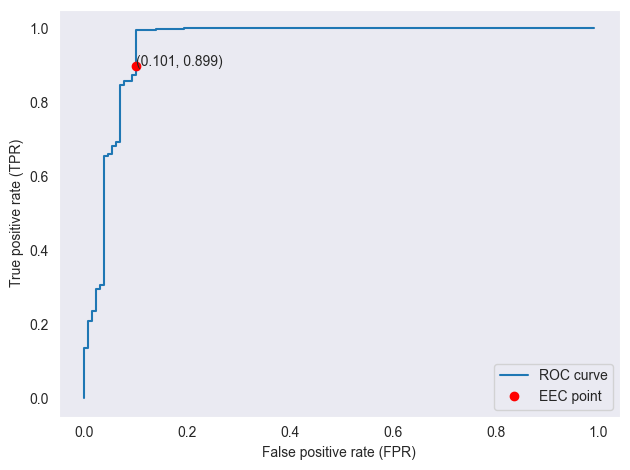

In [24]:
plt.figure()
plt.plot(FPR, TPR)
plt.plot(EER[0], EER[1], 'ro')
plt.annotate(f'({EER[0]:.3f}, {EER[1]:.3f})', (EER[0], EER[1]))
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
labels = ['ROC curve', 'EEC point']
plt.legend(labels)
plt.grid()
plt.tight_layout()
plt.show()

**Student's comments to Exercise 4**

*Add comments to the results of Exercise 4 here (may use LateX for formulas if needed).*

**Exercise 5 – Classification – continuous data**

This exercise employs the Iris dataset already employed in Exercise 1, and performs model fitting and classification using several versions of **Gaussian discriminative analysis**. However, for this exercise the available data have to be divided into two sets, namely *training* and *test* data. 

You will have to 1) re-fit the training data to the specific model (see below), 2) classify each of the test samples, and 3) calculate the accuracy of each classifier.

Classifiers to be employed:
*   Two-class quadratic discriminant analysis (fitting: both mean values and covariance matrices are class-specific – same as in exercise 1).
*   Two-class linear discriminant analysis (fitting: class-specific mean values as in the previous case. Shared covariance matrix is calculated putting together the elements of both classes; the mean values should also be recalculated accordingly).

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

Dataset1 = h5py.File("Lab2_Ex_1_Iris.hdf5")
Data = np.array(Dataset1.get('Dataset'))

Train = Data[:50, :]
Test = Data[50:, :]
X_train = Train[:, :2]
y_train = Train[:, 2]
X_test = Test[:, :2]
y_test = Test[:, 2]

In [107]:
dataset_c = [X_train[y_train == 0, :], X_train[y_train == 1, :]]
pi_c = [len(dataset_c[c]) / len(X_train) for c in range(2)]
mean_train_c = [np.mean(dataset_c[c], axis=0) for c in range(2)]
cov_train_c = [np.cov(dataset_c[c].T) for c in range(2)]
cov_train = np.cov(X_train.T)

In [108]:
def mahalanobis_dist(x, mean=None, cov=None):
    if mean is None:
        mean = np.mean(x, axis=1)
    if cov is None:
        cov = np.cov(x, rowvar=False)   # cov_matrix(x, mean)
    a = (x.T - mean)
    bc = np.linalg.inv(cov) @ a.T
    return np.array([np.multiply(a.T[c], bc[c]) for c in range(2)]).sum(axis=0)

In [109]:
# QDA - Training
posterior_c = [np.empty(len(X_train)) for c in range(2)]
for c in range(2):
    m_dist = mahalanobis_dist(X_train.T, mean=mean_train_c[c], cov=cov_train_c[c])
    posterior_c[c] = pi_c[c] * np.linalg.det(2 * np.pi * cov_train_c[c]) * np.exp(-m_dist / 2)
tot_posterior = np.array([posterior_c[c] for c in range(2)]).sum(axis=0)
qda = np.array([np.divide(posterior_c[c], tot_posterior) for c in range(2)])
results = np.array([np.argmax(qda[:, i]) for i in range(len(X_train))])
success = np.sum([results[i] == y_train[i] for i in range(len(X_train))])
print(f'Accuracy (test set): {100 * success / len(X_train)}%')

Accuracy (test set): 92.0%


In [110]:
# QDA - Test
posterior_c = [np.empty(len(X_test)) for c in range(2)]
for c in range(2):
    m_dist = mahalanobis_dist(X_test.T, mean=mean_train_c[c], cov=cov_train_c[c])
    posterior_c[c] = pi_c[c] * np.linalg.det(2 * np.pi * cov_train_c[c]) * np.exp(-m_dist / 2)
tot_posterior = np.array([posterior_c[c] for c in range(2)]).sum(axis=0)
qda = np.array([np.divide(posterior_c[c], tot_posterior) for c in range(2)])
results = np.array([np.argmax(qda[:, i]) for i in range(len(X_test))])
success = np.sum([results[i] == y_test[i] for i in range(len(X_test))])
print(f'Accuracy (test set): {100 * success / len(X_test)}%')

Accuracy (test set): 88.0%


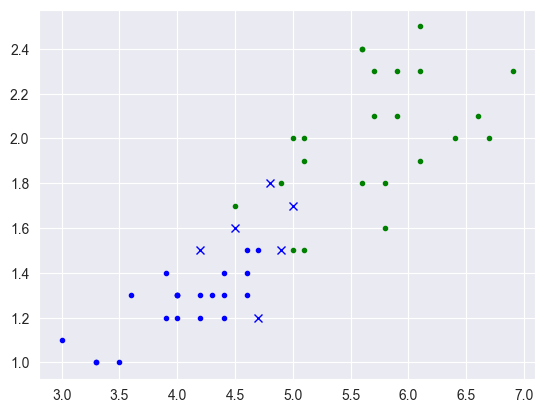

In [111]:
plt.figure()
x0_true, x0_false, x1_true, x1_false = [], [], [], []
for i in range(len(X_test)):
    if results[i] == y_test[i]:
        if y_test[i] == 0:
            x0_true.append(X_test[i])
        else:
            x1_true.append(X_test[i])
    else:
        if y_test[i] == 0:
            x0_false.append(X_test[i])
        else:
            x1_false.append(X_test[i])
x0_true, x0_false, x1_true, x1_false = np.array(x0_true), np.array(x0_false), np.array(x1_true), np.array(x1_false)
if len(x0_true) > 0:
    plt.plot(x0_true[:, 0], x0_true[:, 1], 'b.')
if len(x1_true) > 0:
    plt.plot(x1_true[:, 0], x1_true[:, 1], 'g.')
if len(x0_false) > 0:
    plt.plot(x0_false[:, 0], x0_false[:, 1], 'bx')
if len(x1_false) > 0:
    plt.plot(x1_false[:, 0], x1_false[:, 1], 'gx')
plt.show()

Linear Discriminant Analysis
For the LDA it is supposed that $\Sigma_c = \Sigma$ holds for all classes

In [112]:
# LDA - Training
beta_c = [np.linalg.inv(cov_train) @ mean_train_c[c] for c in range(2)]
gamma_c = [-0.5 * mean_train_c[c].T @ beta_c[c] + np.log(pi_c[c]) for c in range(2)]
nu_c = [beta_c[c] @ X_train.T + gamma_c[c] for c in range(2)]
posterior_c = [np.exp(nu_c[c]) for c in range(2)]
tot_posterior = np.array(posterior_c).sum(axis=0)
lda = np.array([np.divide(posterior_c[c], tot_posterior) for c in range(2)])
results = np.array([np.argmax(lda[:, i]) for i in range(len(X_train))])
success = np.sum([results[i] == y_train[i] for i in range(len(X_train))])
print(f'Accuracy (test set): {100 * success / len(X_train)}%')

Accuracy (test set): 98.0%


In [113]:
# LDA - Test
beta_c = [np.linalg.inv(cov_train) @ mean_train_c[c] for c in range(2)]
gamma_c = [-0.5 * mean_train_c[c].T @ beta_c[c] + np.log(pi_c[c]) for c in range(2)]
nu_c = [beta_c[c] @ X_test.T + gamma_c[c] for c in range(2)]
posterior_c = [np.exp(nu_c[c]) for c in range(2)]
tot_posterior = np.array(posterior_c).sum(axis=0)
lda = np.array([np.divide(posterior_c[c], tot_posterior) for c in range(2)])
results = np.array([np.argmax(lda[:, i]) for i in range(len(X_test))])
success = np.sum([results[i] == y_test[i] for i in range(len(X_test))])
print(f'Accuracy (test set): {100 * success / len(X_test)}%')

Accuracy (test set): 90.0%


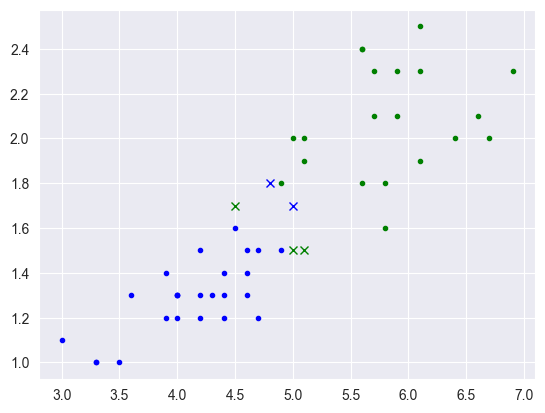

In [114]:
plt.figure()
x0_true, x0_false, x1_true, x1_false = [], [], [], []
for i in range(len(X_test)):
    if results[i] == y_test[i]:
        if y_test[i] == 0:
            x0_true.append(X_test[i])
        else:
            x1_true.append(X_test[i])
    else:
        if y_test[i] == 0:
            x0_false.append(X_test[i])
        else:
            x1_false.append(X_test[i])
x0_true, x0_false, x1_true, x1_false = np.array(x0_true), np.array(x0_false), np.array(x1_true), np.array(x1_false)
if len(x0_true) > 0:
    plt.plot(x0_true[:, 0], x0_true[:, 1], 'b.')
if len(x1_true) > 0:
    plt.plot(x1_true[:, 0], x1_true[:, 1], 'g.')
if len(x0_false) > 0:
    plt.plot(x0_false[:, 0], x0_false[:, 1], 'bx')
if len(x1_false) > 0:
    plt.plot(x1_false[:, 0], x1_false[:, 1], 'gx')
plt.show()

**Student's comments to Exercise 5**

*Add comments to the results of Exercise 5 here (may use LateX for formulas if needed).*

**Exercise 6 – Classification – continuous data**

Classify the data in the phoneme dataset from Lab. 1 using quadratic discriminant analysis, linear discriminat analysis and a Naive Bayes classifier. 

Compute the accuracy of each classifier and compare its performance with that of the k-nn classifier developed in Lab. 1.

Note: in Lab1 we had to employ a subset of the oiginal dataset due to the fact that k-nn has a quadratic complexity making it unfit for use on large datasets. The algorithms illustrated in this Lab have smaller complexity and thus it is possible to train on more data.

For this exercise you can use the sklearn library.

In [115]:
import numpy as np
import h5py
from scipy.stats import multivariate_normal

Dataset2 = h5py.File("Lab2_Ex_6_phoneme.hdf5")
Data = np.array(Dataset2.get('Dataset'))

Train = Data[:4000, :]
Test = Data[4000:, :]
len_dat = np.shape(Test)[0]

from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

#Part 1
clf1 = LinearDiscriminantAnalysis()
clf1.fit(Train[:, :-1], Train[:, -1])
results1 = clf1.predict(Test[:, :-1])
N_true1 = np.count_nonzero(results1 == Test[:, -1])
print('Results for LDA')
print('Predicted %d out of %d elements (Accuracy: %.2f%%)' % (N_true1, len_dat, 100 * N_true1 / len_dat))

#Part 2
clf2 = QuadraticDiscriminantAnalysis()
clf2.fit(Train[:, :-1], Train[:, -1])
results2 = clf2.predict(Test[:, :-1])
N_true2 = np.count_nonzero(results2 == Test[:, -1])
print('Results for QDA')
print('Predicted %d out of %d elements (Accuracy: %.2f%%)' % (N_true2, len_dat, 100 * N_true2 / len_dat))

#Part 3
clf3 = GaussianNB()
clf3.fit(Train[:, :-1], Train[:, -1])
results3 = clf3.predict(Test[:, :-1])
N_true3 = np.count_nonzero(results3 == Test[:, -1])
print('Results for NBC')
print('Predicted %d out of %d elements (Accuracy: %.2f%%)' % (N_true3, len_dat, 100 * N_true3 / len_dat))

Results for LDA
Predicted 479 out of 509 elements (Accuracy: 94.11%)
Results for QDA
Predicted 452 out of 509 elements (Accuracy: 88.80%)
Results for NBC
Predicted 459 out of 509 elements (Accuracy: 90.18%)


**Student's comments to Exercise 6**

*Add comments to the results of Exercise 6 here (may use LateX for formulas if needed).*